In [3]:
import topojson
from shapely import geometry
from shapely.ops import shared_paths
from shapely.ops import linemerge

In [4]:
def junctions_two_lines(junctions, g1, g2):
    forward, backward = shared_paths(g1, g2)    
    
    if backward.is_empty and forward.is_empty:
        print('both empty')
        
    elif backward.is_empty:
        shared_segments = forward
    elif forward.is_empty:    
        shared_segments = backward       
    else:
        print('both full')  
        shared_segments = geometry.MultiLineString([linemerge(forward),linemerge(backward)])

    for segment in shared_segments:
        #print(segment.wkt)
        xy = list(segment.coords) 
        xy[::len(list(xy))-1]
        junctions.extend(xy)

    # only get coordinates that appear only once
    junctions = [i for i in junctions if junctions.count(i) is 1]        
        
    return junctions

In [5]:
# equal lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]},
#     "abc2": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]}
# } 

# # forward backward lines
# data = {
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# } 

# more than two lines
data = {
    "abc1": {"type": "LineString", "coordinates": [[0, 0], [15, 2.5], [30, 5]]},
    "abc2": {"type": "LineString", "coordinates": [[0, 0], [15, 2.5], [30, 5]]},
    "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
    "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
}

In [10]:
extract = topojson.extract(data)

In [11]:
forward_backward = shared_paths(extract['lines'][0], extract['lines'][0]) 

In [15]:
forward_backward[1]

In [7]:
join = topojson.join(extract)

IndexError: tuple index out of range

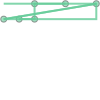

In [6]:
geometry.GeometryCollection([
    geometry.MultiPoint(join['junctions']),
    geometry.MultiLineString(join['lines'])
])